<center><h1><font color='red'> Guide 6 |  Basic ML Tools </font></h1></center>


## Objective
* Supervised
  - SVM
* Unsupervised
  - Dimensional Reduction: PCA, UMAP, tSNE
  - Clustering methods: KMeans, GMM, HDBSCAN

## Table of Content:
0. content 1
1. content 2

In [15]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [32]:
from sklearn.datasets import load_iris
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas
import seaborn as sns

In [56]:
data_obj = load_iris(as_frame=True)
df_iris = data_obj['frame']

In [61]:
df_iris

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0         0  
1         0  
2         0  
3         0  
4         0  
..      ...  
145       2  
146       2  
147       2  
148       2  
149       2  

[150 rows x 5 columns]

<Figure size 360x360 with 0 Axes>

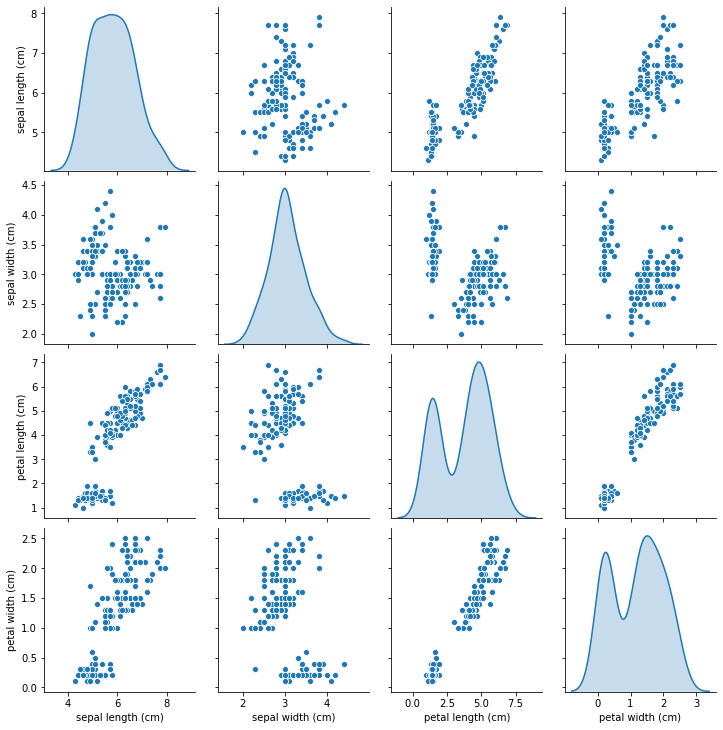

In [65]:
plt.figure(figsize=(5,5))
# without labelling
sns.pairplot(df_iris, 
             diag_kind='kde', 
             vars=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])
# with labelling
# sns.pairplot(df_iris, 
#              diag_kind='kde', 
#              vars=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'],
#             hue='target')
plt.show()

In [73]:
X = df_iris.iloc[:,:4].to_numpy()
y = df_iris.iloc[:,4].to_numpy()

## 0. Supervised

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)
print(f"X Shape: {X.shape}")
print(f"y Shape: {y.shape}")

print(f"X_train Shape: {X_train.shape}")
print(f"X_test Shape: {X_test.shape}")

X Shape: (150, 4)
y Shape: (150,)
X_train Shape: (100, 4)
X_test Shape: (50, 4)


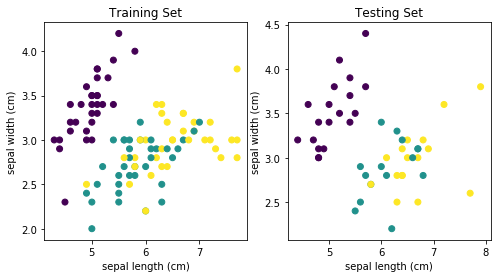

In [104]:
fig, ax = plt.subplots(1,2,figsize=(8,4))
ax[0].scatter(X_train[:,0], X_train[:,1], c=y_train)
ax[0].set_xlabel("sepal length (cm)"); ax[0].set_ylabel("sepal width (cm)"); ax[0].set_title("Training Set")

ax[1].scatter(X_test[:,0], X_test[:,1], c=y_test)
ax[1].set_xlabel("sepal length (cm)"); ax[1].set_ylabel("sepal width (cm)"); ax[1].set_title("Testing Set")
plt.show()

#### 0.0 SVM: Support Vector Machine
sklearn guide: https://scikit-learn.org/stable/modules/svm.html

In [81]:
from sklearn import svm
model = svm.SVC(kernel='linear', C=1.0)
model.fit(X_train, y_train)

SVC(kernel='linear')

In [82]:
y_predict = model.predict(X_test)

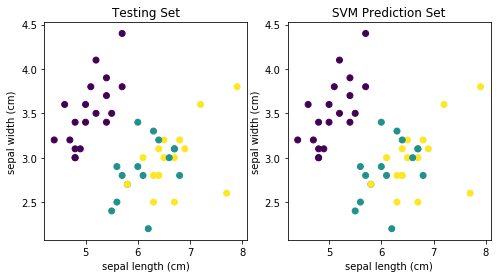

In [105]:
fig, ax = plt.subplots(1,2,figsize=(8,4))
ax[0].scatter(X_test[:,0], X_test[:,1], c=y_test)
ax[0].set_xlabel("sepal length (cm)"); ax[0].set_ylabel("sepal width (cm)"); ax[0].set_title("Testing Set")

ax[1].scatter(X_test[:,0], X_test[:,1], c=y_predict)
ax[1].set_xlabel("sepal length (cm)"); ax[1].set_ylabel("sepal width (cm)"); ax[1].set_title("SVM Prediction Set")
plt.show()

In [123]:
print("TEST:")
print(y_test)
print("PREDICTION:")
print(y_predict)
num_correct = len(np.where(y_test-y_predict == 0)[0])
print(f"Accuracy: {100*num_correct/len(y_test)}%")

TEST:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 2 2 1 2]
PREDICTION:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 2 2 1 2]
Accuracy: 100.0%


#### 0.1 Neural Network: Multilayer Perceptron
sklearn guide: https://scikit-learn.org/stable/modules/neural_networks_supervised.html

In [124]:
from sklearn.neural_network import MLPClassifier
NN_model = MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(10, 5), random_state=1)
NN_model.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(10, 5), random_state=1,
              solver='lbfgs')

In [125]:
y_NN_predict = NN_model.predict(X_test)

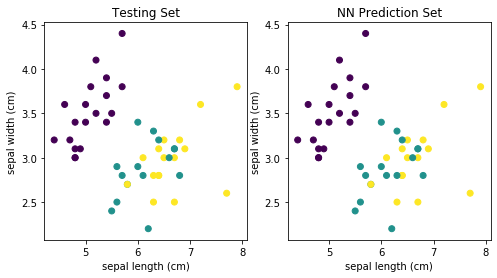

In [149]:
fig, ax = plt.subplots(1,2,figsize=(8,4))
ax[0].scatter(X_test[:,0], X_test[:,1], c=y_test)
ax[0].set_xlabel("sepal length (cm)"); ax[0].set_ylabel("sepal width (cm)"); ax[0].set_title("Testing Set")

ax[1].scatter(X_test[:,0], X_test[:,1], c=y_NN_predict)
ax[1].set_xlabel("sepal length (cm)"); ax[1].set_ylabel("sepal width (cm)"); ax[1].set_title("NN Prediction Set")
plt.show()

In [127]:
print("TEST:")
print(y_test)
print("PREDICTION:")
print(y_NN_predict)
num_correct = len(np.where(y_test-y_NN_predict == 0)[0])
print(f"Accuracy: {100*num_correct/len(y_test)}%")

TEST:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 2 2 1 2]
PREDICTION:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 1 2 1 2]
Accuracy: 98.0%


## 1. Unsupervised

### 1.0 Clustering

#### 1.0.0 K-Means
sklearn link: https://scikit-learn.org/stable/modules/clustering.html#k-means

In [184]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=3, random_state=3)
kmeans_model.fit(X) # what is different here?!

KMeans(n_clusters=3, random_state=3)

In [185]:
y_kmeans_pred = kmeans_model.labels_

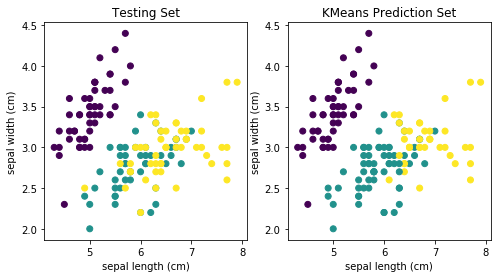

In [186]:
fig, ax = plt.subplots(1,2,figsize=(8,4))
ax[0].scatter(X[:,0], X[:,1], c=y)
ax[0].set_xlabel("sepal length (cm)"); ax[0].set_ylabel("sepal width (cm)"); ax[0].set_title("Testing Set")

ax[1].scatter(X[:,0], X[:,1], c=y_kmeans_pred)
ax[1].set_xlabel("sepal length (cm)"); ax[1].set_ylabel("sepal width (cm)"); ax[1].set_title("KMeans Prediction Set")
plt.show()

In [211]:
print("TEST:")
print(y)
print("PREDICTION:")
print(y_kmeans_pred)
num_correct = len(np.where(y-y_kmeans_pred == 0)[0])
print(f"Accuracy: {100*num_correct/len(y)}%")

TEST:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
PREDICTION:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
Accuracy: 89.33333333333333%


#### 1.0.1 DBSCAN
sklearn link: https://scikit-learn.org/stable/modules/clustering.html#dbscan

In [205]:
from sklearn.cluster import DBSCAN
dbscan_model = DBSCAN(eps=1, min_samples=5)
y_dbscan_pred = dbscan_model.fit_predict(X) # what is different here?!

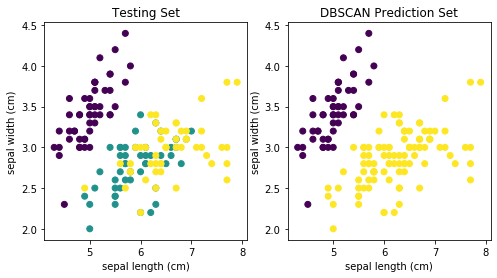

In [206]:
fig, ax = plt.subplots(1,2,figsize=(8,4))
ax[0].scatter(X[:,0], X[:,1], c=y)
ax[0].set_xlabel("sepal length (cm)"); ax[0].set_ylabel("sepal width (cm)"); ax[0].set_title("Testing Set")

ax[1].scatter(X[:,0], X[:,1], c=y_dbscan_pred)
ax[1].set_xlabel("sepal length (cm)"); ax[1].set_ylabel("sepal width (cm)"); ax[1].set_title("DBSCAN Prediction Set")
plt.show()

In [212]:
print("TEST:")
print(y)
print("PREDICTION:")
print(y_dbscan_pred)
num_correct = len(np.where(y-y_dbscan_pred == 0)[0])
print(f"Accuracy: {100*num_correct/len(y)}%")

TEST:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
PREDICTION:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
Accuracy: 66.66666666666667%


#### 1.1 Manifold Learning
sklearn link: https://scikit-learn.org/stable/modules/manifold.html

#### 1.1.0 PCA
sklearn link: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [213]:
from sklearn.decomposition import PCA

pca_model = PCA(n_components=2)
X_PCA_red = pca_model.fit_transform(X)

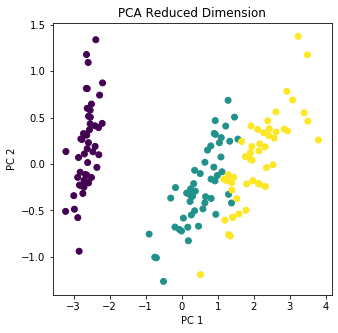

In [221]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
plt.scatter(X_PCA_red[:,0], X_PCA_red[:,1], c=y)
plt.xlabel("PC 1"); plt.ylabel("PC 2"); plt.title("PCA Reduced Dimension")
plt.show()

In [226]:
from sklearn.manifold import TSNE

tsne_model = TSNE(n_components=2)
X_tsne_red = tsne_model.fit_transform(X)

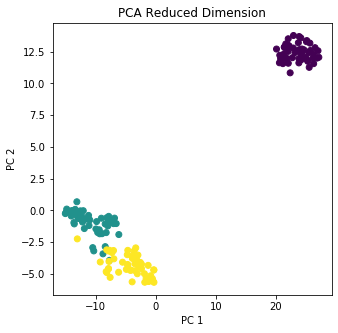

In [227]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
plt.scatter(X_tsne_red[:,0], X_tsne_red[:,1], c=y)
plt.xlabel("PC 1"); plt.ylabel("PC 2"); plt.title("PCA Reduced Dimension")
plt.show()

<hr>
<strong>Created: </strong> August 15, 2020

<strong>Author: </strong> Dong Hur
<center><h1>Reference</h1></center>


* Dataset from Professor Venkatesh Murthy's Lab (Harvard University Department of Mollecular and Cellular Biology)